# Foundations of Computational Economics #31

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Function approximation in Python

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/liNputEfcXQ](https://youtu.be/liNputEfcXQ)

Description: How to approximate functions which are only defined on grid of points. Spline and polynomial interpolation.

### Interpolation problem

- $ f(x) $ is function of interest, hard to compute  
- Have data on values of $ f(x) $ in $ n $ points
  $ (x_1,\dots,x_n) $  


$$
f(x_1), f(x_2), \dots f(x_n)
$$

- Need to find the approximate value of the function $ f(x) $ in
  arbitrary points $ x \in [x_1,x_n] $  

#### Approaches

1. *Piece-wise* approach (connect the dots)  


- Which functional form to use for connections?  
- What are advantages and disadvantages?  


1. Use a *similar* function $ s(x) $ to represent $ f(x) $
  between the data points  


- Which simpler function?  
- What data should be used?  
- How to control the accuracy of the approximation?  

#### Distinction between function approximation (interpolation) and curve fitting

- Functions approximation and interpolation refers to the situations
  when **data** on function values is matched **exactly**  
  - The approximation curve passes through the points of the data  
- Curve fitting refers to the statistical problem when the data has
  **noise**, the task is to find an approximation for the central
  tendency in the data  
  - Linear and non-linear regression models, econometrics  
  - The model is *over-identified* (there is more data than needed to
    exactly identify the regression function)  

#### Extrapolation

Extrapolation is computing the approximated function outside of the
original data interval

**Should be avoided in general**

- Exact *only* when theoretical properties of the extrapolated function
  are known  
- Can be used with extreme caution and based on the analysis of the model  
- Always try to introduce wider bounds for the grid instead  

### Spline interpolation

Spline = curve composed of independent pieces

**Definition** A function $ s(x) $ on $ [a,b] $ is a spline of
order $ n $ ( = degree $ n-1 $) iff

- $ s $ is $ C^{n-2} $ on $ [a,b] $ (has continuous derivatives
  up to order $ n-2 $),  
- given *knot* points $ a=x_0<x_1<\dots<x_m=b $, $ s(x) $ is a
  polynomial of degree $ n-1 $ on each subinterval
  $ [x_i,x_{i+1}] $, $ i=0,\dots,m-1 $  

#### Cubic splines = spline of order 4

- Data set $ \{(x_i,f(x_i), i=0,\dots,n\} $  
- Functional form $ s(x) = a_i + b_i x + c_i x^2 + d_i x^3 $ on
  $ [x_{i-1},x_i] $ for $ i=1,\dots,n $  
- $ 4n $ unknown coefficients:  
- $ 2n $ equations to make sure each segment passes through its interval points +
  $ 2(n-1) $ equations to ensure two continuous derivatives at each interior point  
- Additional 2 equation for the $ x_0 $ and $ x_n $  
  - $ s''(x_0)=s''(x_n)=0 $ (natural spline)  
  - $ s'(x_0)=\frac{s(x_1)-s(x_0)}{x_1-x_0} $,
    $ s'(x_n)=\frac{s(x_n)-s(x_{n-1})}{x_n-x_{n-1}} $
    (secant-Hermite)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2008) # fix random number sequences
x  = np.sort(np.random.uniform(-5,10,12)) # sorted random numbers on [-5,10]
xr = np.linspace(-5,10,12) # regular grid on [-5,10]

func=lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2) # function to interpolate

In [2]:
def plot1(ifunc,fdata=(x,func(x)),f=func,color='b',label='',extrapolation=False):
    '''helper function to make plots'''
    xd = np.linspace(-5,10,1000) # for making continuous lines
    plt.figure(num=1, figsize=(10,8))
    plt.scatter(fdata[0],fdata[1],color='r') # interpolation data
    plt.plot(xd,f(xd),color='grey') # true function
    if extrapolation:
        xdi = xd
    else:
        # restriction for interpolation only
        xdi=xd[np.logical_and(xd>=fdata[0][0],xd<=fdata[0][-1])]
    if ifunc:
        plt.plot(xdi,ifunc(xdi),color=color,label=label)
        if label:
            plt.legend()
    elif label:
        plt.title(label)

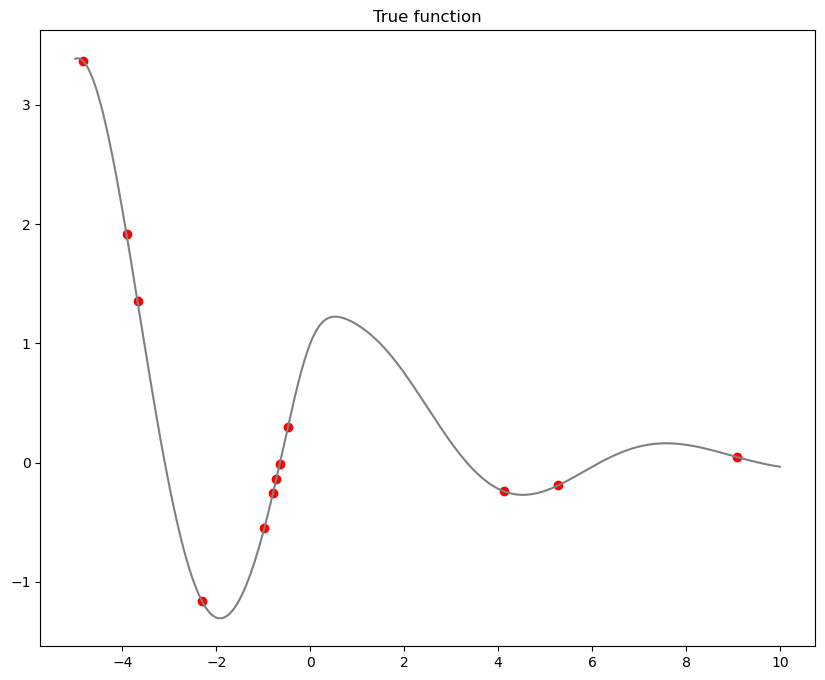

In [3]:
plot1(None,label='True function')

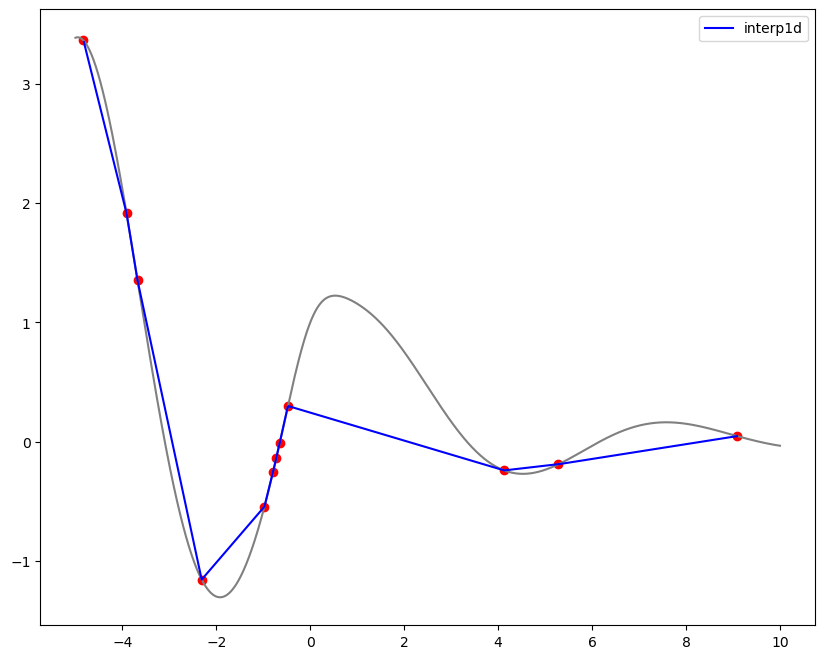

In [4]:
from scipy import interpolate # Interpolation routines
fi = interpolate.interp1d(x,func(x)) # returns the interpolation function
plot1(fi,label='interp1d')

In [5]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

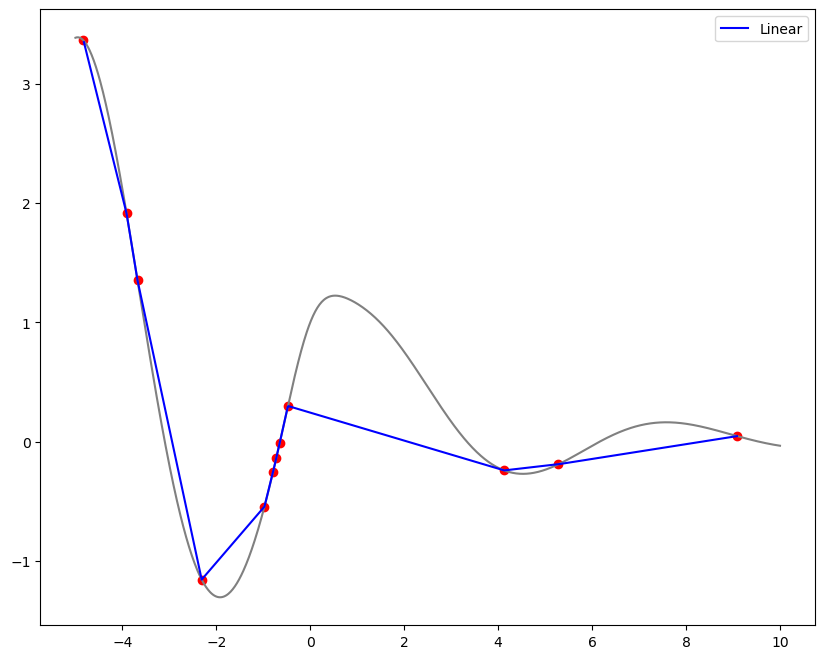

In [6]:
fi = interpolate.interp1d(x,func(x),kind='linear')
plot1(fi,label='Linear')

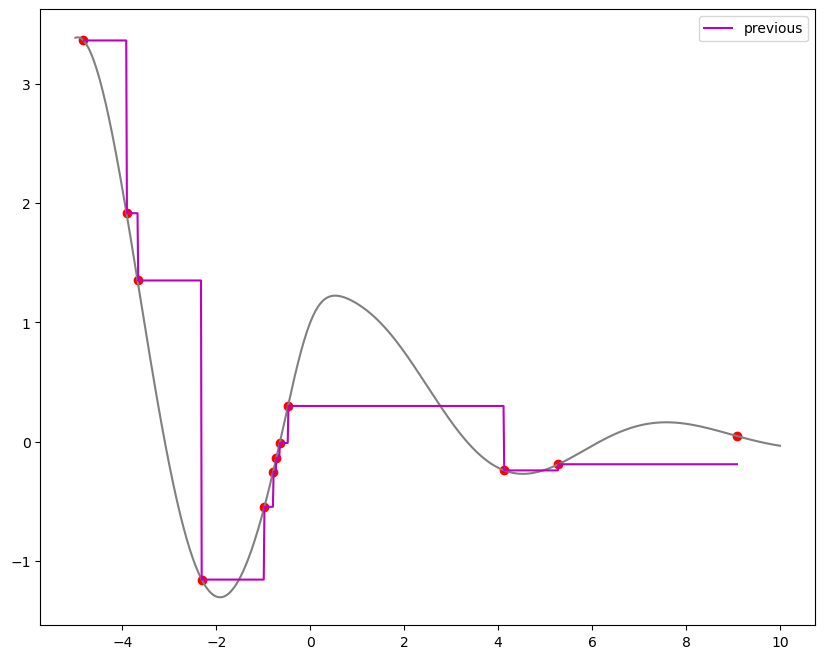

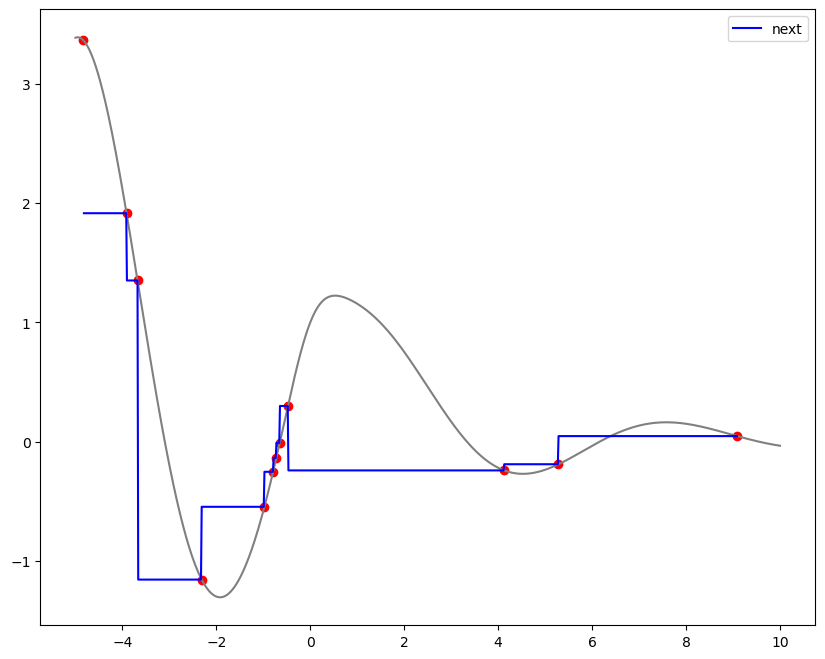

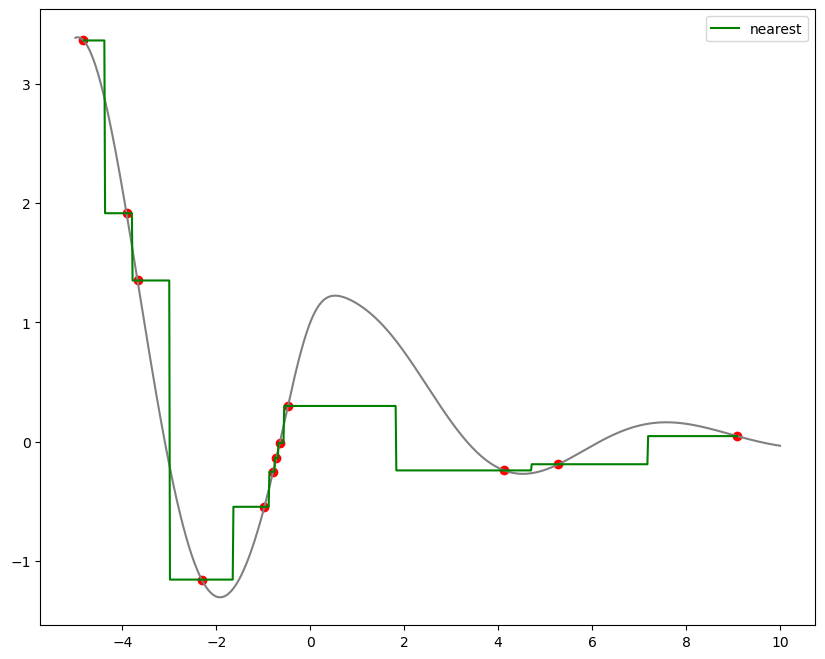

In [7]:
for knd, clr in ('previous','m'),('next','b'),('nearest','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd)
    plot1(fi,label=knd,color=clr)
    plt.show()

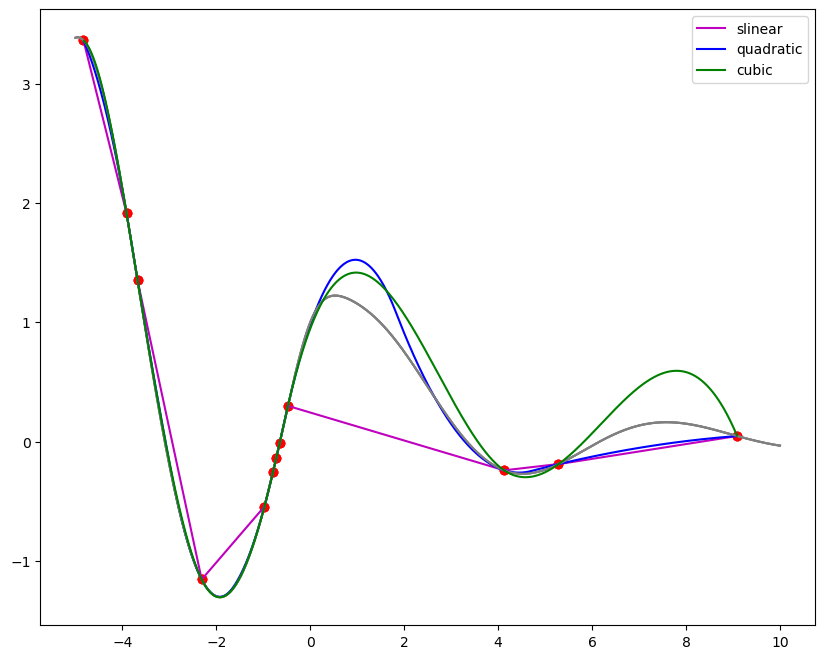

In [8]:
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd)
    plot1(fi,color=clr,label=knd)

Max error with  slinear splines is 1.05142e+00
Max error with  quadratic splines is 3.89974e-01
Max error with  cubic splines is 4.35822e-01


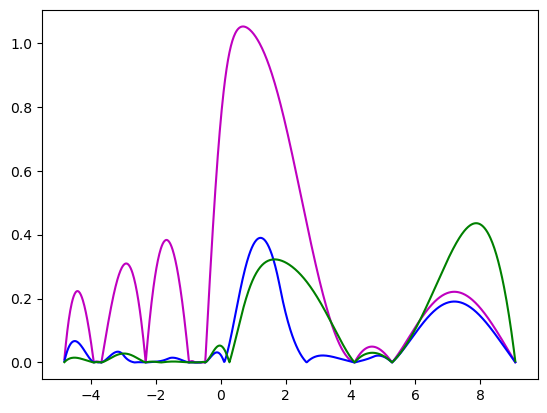

In [9]:
# Approximation errors
# x = np.sort(np.random.uniform(-5,10,11))  # generate new data
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

Max error with  slinear splines is 4.63043e-01
Max error with  quadratic splines is 3.48546e-01
Max error with  cubic splines is 1.89578e-01


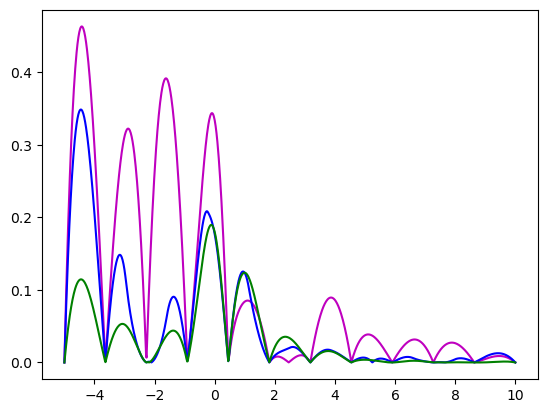

In [10]:
# Approximation errors for regular grid
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(xr,func(xr),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

#### Accuracy of the interpolation

How to reduce approximation errors?

- Number of nodes (more is better)  
- Location of nodes (regular is better)  
- Interpolation type (match function of interest)  


*In economic models we usually can control all of these*

### Polynomial approximation/interpolation

Back to the beginning to explore the idea of replacing original
$ f(x) $ with simpler $ g(x) $

- Data set $ \{(x_i,f(x_i)\}, i=0,\dots,n $  
- Functional form is polynomial of degree $ n $ such that $ g(x_i)=f(x_i) $  
- If $ x_i $ are distinct, coefficients of the polynomial are uniquely identified  


Does polynomial $ g(x) $ converge to $ f(x) $ when there are
more points?

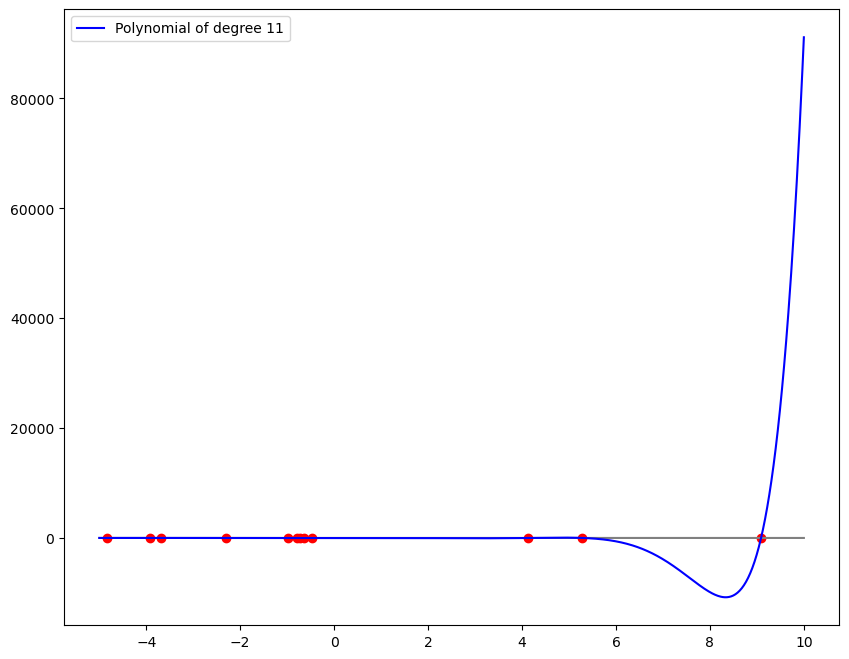

In [11]:
from numpy.polynomial import polynomial
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(x,func(x),degree)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,label='Polynomial of degree %d'%degree,extrapolation=True)

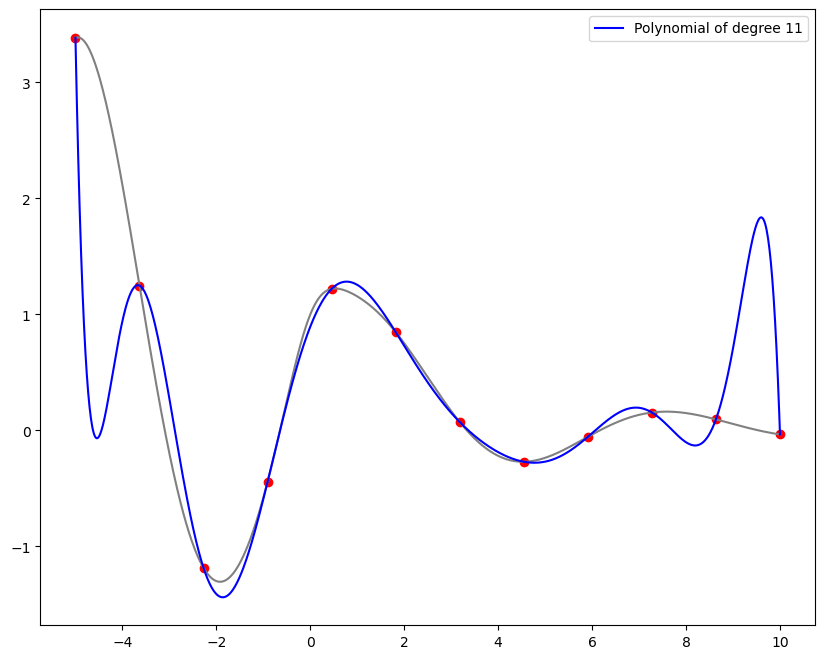

In [12]:
# now with regular grid
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(xr,func(xr),degree)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,extrapolation=True)

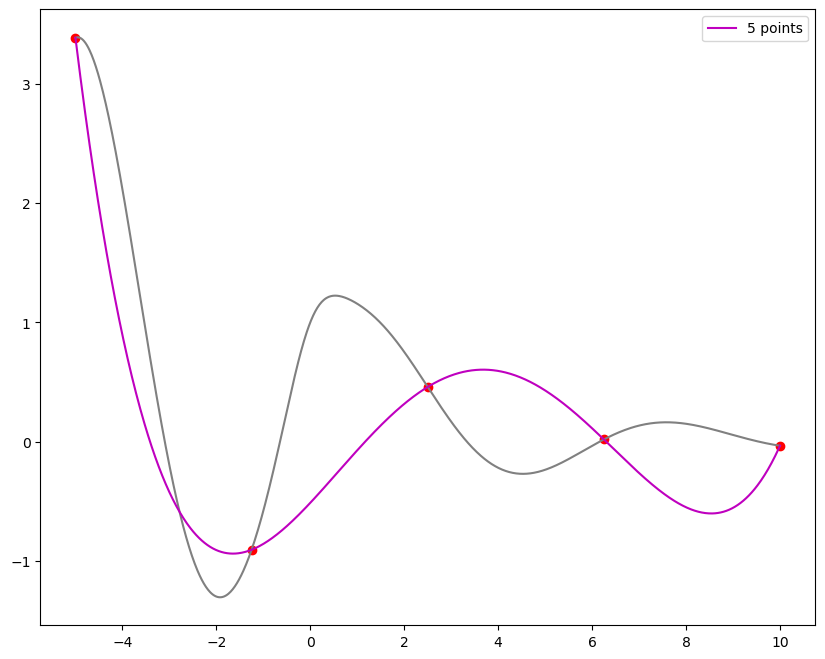

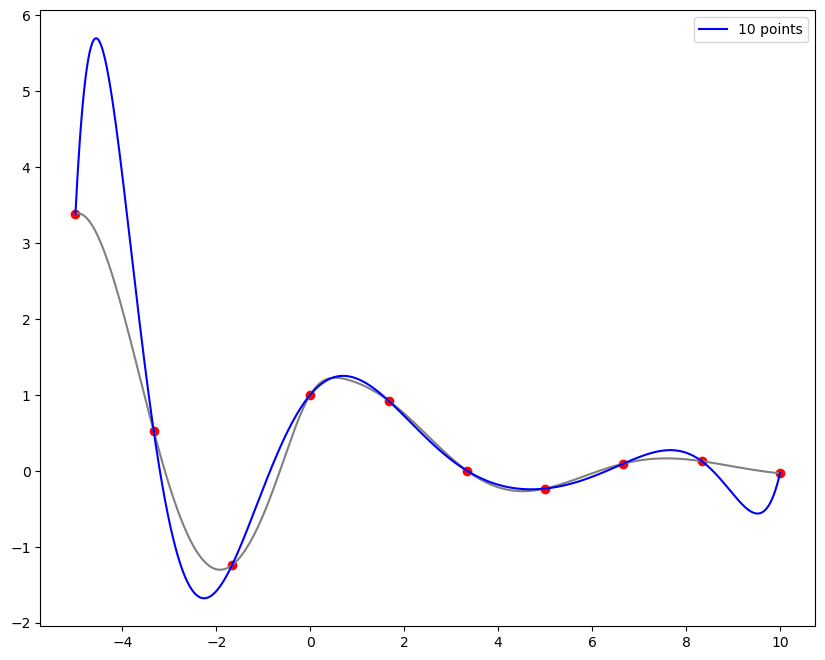

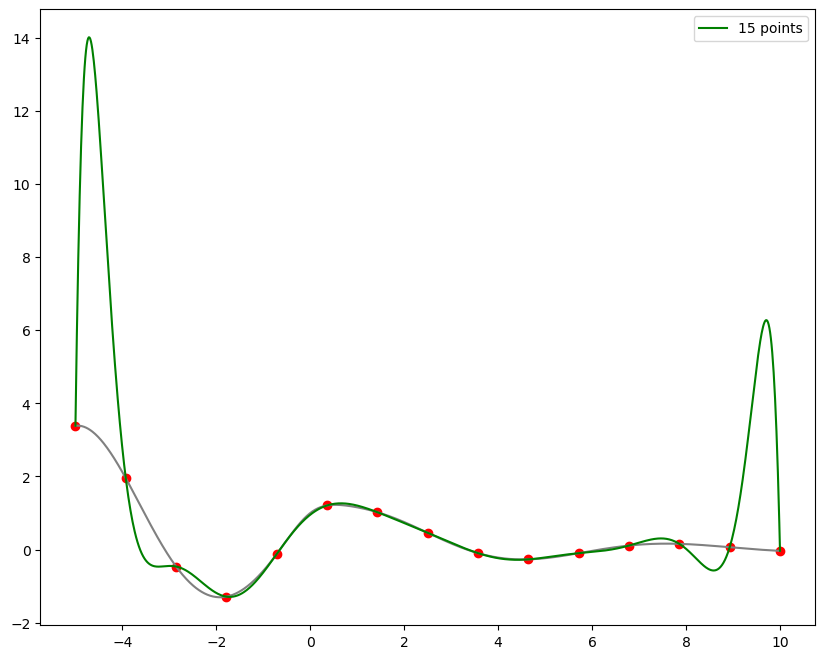

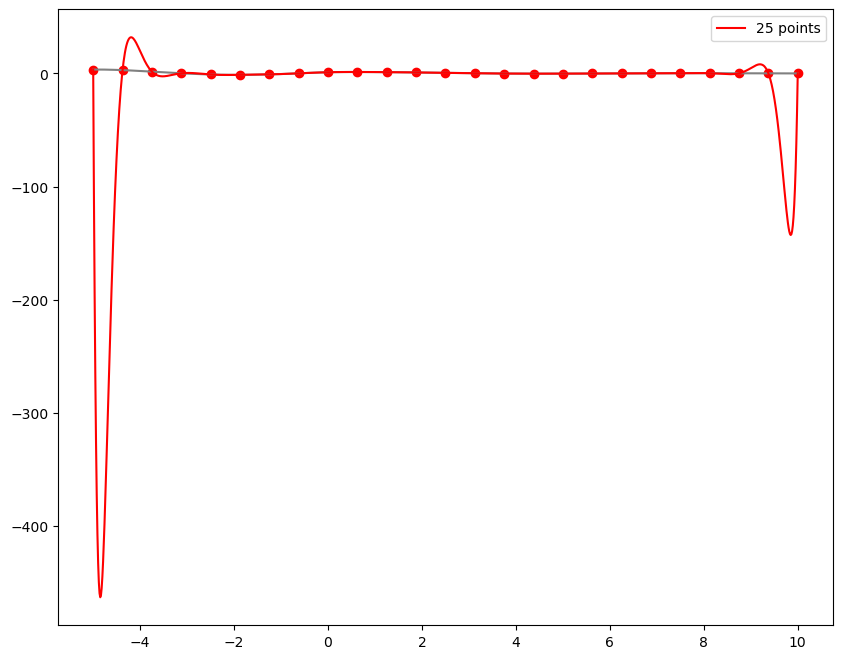

In [13]:
# how number of points affect the approximation (with degree=n-1)
for n, clr in (5,'m'),(10,'b'),(15,'g'),(25,'r'):
    x2 = np.linspace(-5,10,n)
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

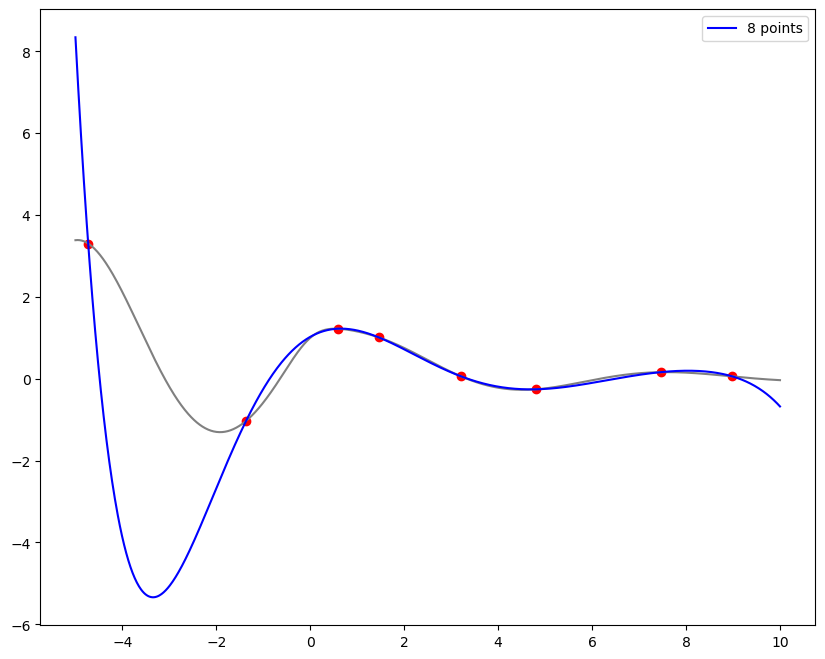

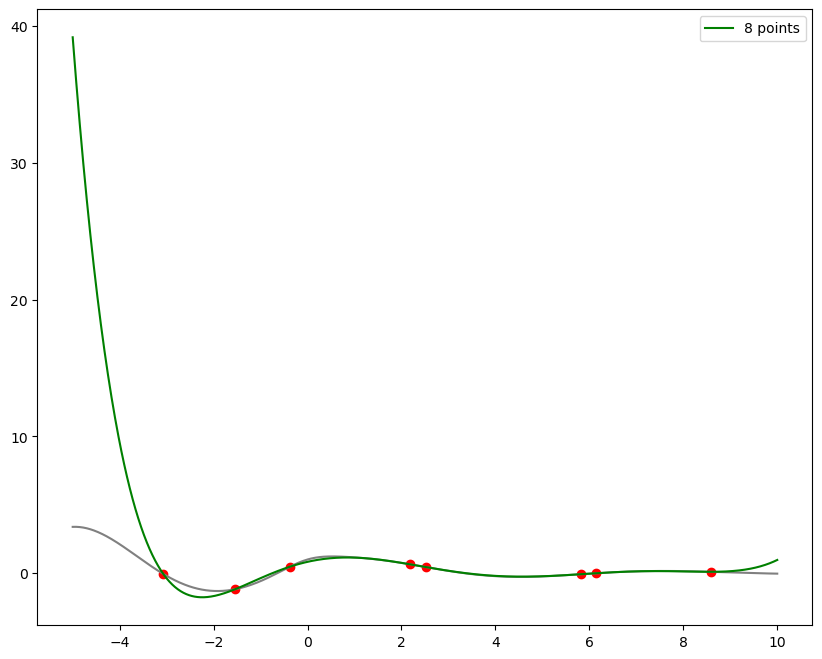

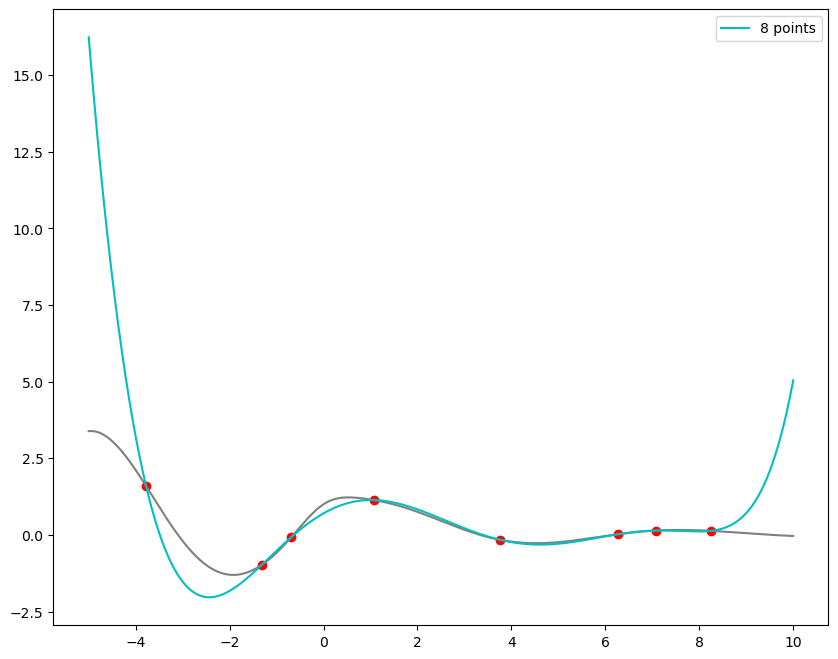

In [14]:
# how locations of points affect the approximation (with degree=n-1)
np.random.seed(2025)
n=8
for clr in 'b','g','c':
    x2 = np.linspace(-4,9,n) + np.random.uniform(-1,1,n) # perturb points a little
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

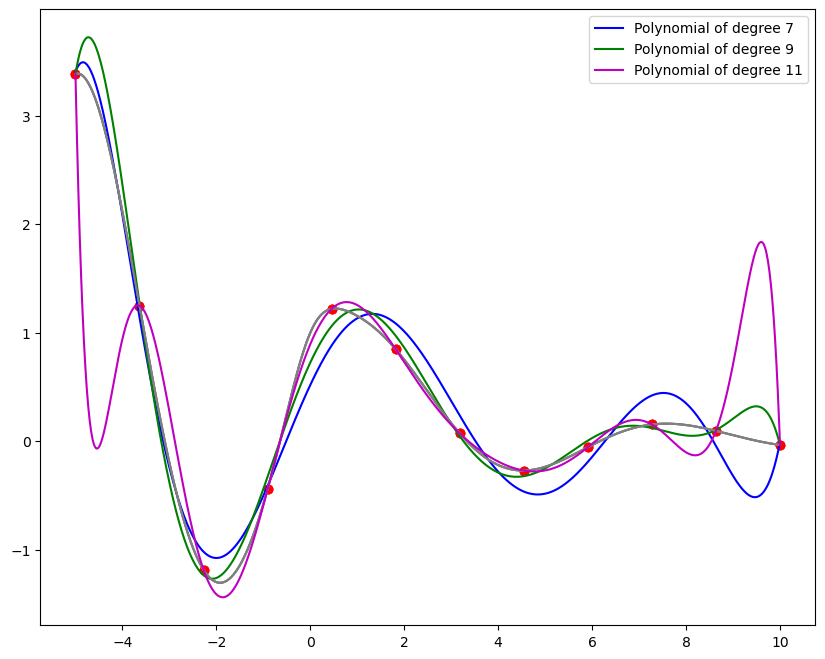

In [15]:
# how degree of the polynomial affects the approximation
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    p=polynomial.polyfit(xr,func(xr),degree)
    fi=lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,color=clr,extrapolation=True)

#### Least squares approximation

We could also go back to **function approximation** and fit polynomials
of lower degree

- Data set $ \{(x_i,f(x_i)\}, i=0,\dots,n $  
- **Any** functional form $ g(x) $ from class $ G $ that best
  approximates $ f(x) $  


$$
g = \arg\min_{g \in G} \lVert f-g \rVert ^2
$$

### Orthogonal polynomial approximation/interpolation

- Polynomials over domain $ D $  
- Weighting function $ w(x)>0 $  


Inner product

$$
\langle f,g \rangle = \int_D f(x)g(x)w(x)dx
$$

$ \{\phi_i\} $ is a family of orthogonal polynomials w.r.t.
$ w(x) $ iff

$$
\langle \phi_i,\phi_j \rangle = 0, i\ne j
$$

#### Best polynomial approximation in L2-norm

Let $ \mathcal{P}_n $ denote the space of all polynomials of degree $ n $ over $ D $

$$
\lVert f - p \rVert_2 = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_2
= \inf_{q \in \mathcal{P}_n}  \left[ \int_D ( f(x)-g(x) )^2 dx  \right]^{\tfrac{1}{2}}
$$

if and only if

$$
\langle f-p,q \rangle = 0, \text{ for all } q \in \mathcal{P}_n
$$

*Orthogonal projection is the best approximating polynomial in L2-norm*

#### Uniform (infinity, sup-) norm

$$
\lVert f(x) - g(x) \rVert_{\infty} = \sup_{x \in D} | f(x) - g(x) |
= \lim_{n \rightarrow \infty} \left[ \int_D ( f(x)-g(x) )^n dx  \right]^{\tfrac{1}{n}}
$$

Measures the absolute difference over the whole domain $ D $

#### Chebyshev (minmax) approximation

What is the best polynomial approximation in the uniform (infinity, sup) norm?

$$
\lVert f - p \rVert_{\infty} = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_{\infty}
= \inf_{q \in \mathcal{P}_n}  \sup_{x \in D} | f(x) - g(x) |
$$

Chebyshev proved existence and uniqueness of the best approximating polynomial in uniform norm.

#### Chebyshev polynomials

- $ [a,b] = [-1,1] $ and $ w(x)=(1-x^2)^{(-1/2)} $  
- $ T_n(x)=\cos\big(n\cos^{-1}(x)\big) $  
- Recursive formulas:  


$$
\begin{eqnarray}
T_0(x)=1,\\
T_1(x)=x,\\
T_{n+1}(x)=2x T_n(x) - T_{n-1}(x)
\end{eqnarray}
$$

#### Accuracy of Chebyshev approximation

Suppose $ f: [-1,1]\rightarrow R $ is $ C^k $ function for some
$ k\ge 1 $, and let $ I_n $ be the degree $ n $ polynomial
interpolation of $ f $ with nodes at zeros of $ T_{n+1}(x) $.
Then

$$
\lVert f - I_n \rVert_{\infty} \le \left( \frac{2}{\pi} \log(n+1) +1 \right) \frac{(n-k)!}{n!}\left(\frac{\pi}{2}\right)^k \lVert f^{(k)}\rVert_{\infty}
$$

📖 Judd (1988) Numerical Methods in Economics

- achieves *best polynomial approximation in uniform norm*  
- works for smooth functions  
- easy to compute  
- but *does not* approximate $ f'(x) $ well  

#### General interval

- Not hard to adapt the polynomials for the general interval
  $ [a,b] $ through linear change of variable  


$$
y = 2\frac{x-a}{b-a}-1
$$

- Orthogonality holds with weights function with the same change of
  variable  

#### Chebyshev approximation algorithm

1. Given $ f(x) $ and $ [a,b] $  
1. Compute Chebyshev interpolation nodes on $ [-1,1] $  
1. Adjust nodes to $ [a,b] $ by change of variable, $ x_i $  
1. Evaluate $ f $ at the nodes, $ f(x_i) $  
1. Compute Chebyshev coefficients $ a_i = g\big(f(x_i)\big) $  
1. Arrive at approximation  


$$
f(x) = \sum_{i=0}^n a_i T_i(x)
$$

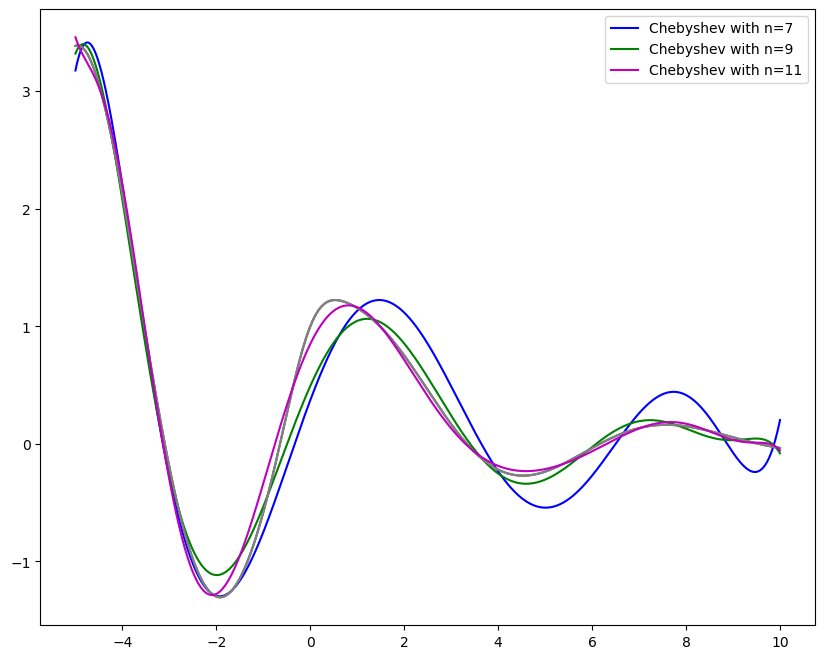

In [16]:
import numpy.polynomial.chebyshev as cheb
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    fi=cheb.Chebyshev.interpolate(func,degree,[-5,10])
    plot1(fi,fdata=(None,None),color=clr,label='Chebyshev with n=%d'%degree,extrapolation=True)

### Multidimensional interpolation

- there are multidimensional generalization to all the methods  
- curse of dimensionality in the number of interpolation points when number of dimensions increase  
- sparse Smolyak grids and adaptive sparse grids  
- irregular grids require computationally expensive triangulation in the general case  
- good application for machine learning!  


**Generally much harder!**

### Further learning resources

- [https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)  
- [https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html)  
- M.H. Mudde’s thesis on Chebyshev approximation [http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf](http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf)  